<a href="https://colab.research.google.com/github/rachelyayra/facial_recognition/blob/main/Face_detector_and_face_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Setup

Mounting google colab on drive


In [1]:
#Connecting or mounting google drive on google collab to allow access to files on Google Collab
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Packages needed


In [2]:
import dlib
import cmake
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import imutils
from imutils import face_utils

function for loading the image

In [3]:
def loadImage(path):
  return cv2.imread(path,cv2.IMREAD_COLOR)

Load the image

In [4]:
image = loadImage('/content/gdrive/MyDrive/facepics/st.jpg')
image1 = loadImage('/content/gdrive/MyDrive/facepics/sevenface.jpg')

## Face Detector

function for converting dlib rectagles to bounding boxes

In [5]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    xmin = rect.left()
    ymin = rect.top()
    w = rect.right() - xmin
    h = rect.bottom() - ymin

    # return a tuple of (x, y, w, h)
    return (xmin, ymin, w, h)

In [6]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

Face dectector

In [7]:

def faceDetector(image):
  detector = dlib.get_frontal_face_detector() #initialise face dectector
  face = detector(image) #detect face
  numberOfFaces = len(face)
  # listOfbb = []
  # for rect in face:
  #   listOfbb.append(rect_to_bb(rect))

  # color = (255, 0, 0)
  # for num in listOfbb:
  #   rect_img = cv2.rectangle(image,num,color)
  print("There are "+str(numberOfFaces)+ " faces in this picture.")
  # cv2_imshow(rect_img)
  return numberOfFaces, face



In [8]:
numFace, faces = faceDetector(image)

There are 1 faces in this picture.


## Face Alignment


In [9]:
#Prediction of landmarks
#intialize the face predictor
predictor = dlib.shape_predictor('/content/gdrive/MyDrive/shape_predictor_68_face_landmarks.dat')

In [16]:
def faceAlignment(image):
  numberOfFaces , face = faceDetector(image)
  if numberOfFaces > 0 :
    desiredLeftEye=(0.35, 0.35)
        #Set the croped image(face) size after rotaion.
    desiredFaceWidth = 128
    desiredFaceHeight = 128
    #Hori = np.empty((desiredFaceWidth, desiredFaceHeight,3))
    for i in face:
      shape = predictor(image,i) # returns object shape
      nd_shape = shape_to_np(shape)
      # for (x,y) in nd_shape[36:42]:
      #   cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
      for (x,y) in nd_shape[43:48]:
        # cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
        righteye = nd_shape[36:42]
        lefteye = nd_shape[43:48]
  #find the center of the eyes
      leftEyeCenter = np.array(lefteye).mean(axis=0).astype("int")
      rightEyeCenter = np.array(righteye).mean(axis=0).astype("int")
      leftEyeCenter = (leftEyeCenter[0],leftEyeCenter[1])
      rightEyeCenter = (rightEyeCenter[0],rightEyeCenter[1])
    #draw a line
      color = (255, 255, 0)
      # cv2.circle(image, leftEyeCenter, 2, color, 1)
      # cv2.circle(image, rightEyeCenter, 2, color, 1)
      # cv2.line(image, leftEyeCenter, rightEyeCenter, color, 1)
      #slope of the line
      dx = rightEyeCenter[0]-leftEyeCenter[0]
      dy = rightEyeCenter[1]-leftEyeCenter[1]
      angle = np.degrees(np.arctan2(dy, dx))
      angle =  180 + angle
      print(f'The face has been rotated through {angle} degrees anticlockwise')
      # to get the face at the center of the image,
      # set desired left eye location. Right eye location
      # will be found out by using left eye location.
      # this location is in percentage

      desiredRightEyeX = 1.0 - desiredLeftEye[0]
      dist = np.sqrt((dx ** 2) + (dy ** 2)) #distance between the eyes
      desiredDist = (desiredRightEyeX - desiredLeftEye[0])
      desiredDist *= desiredFaceWidth
      scale = desiredDist / dist
        #finding the midpiont between the eyes
      eyecolor = (255, 5, 0)
      eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2, (leftEyeCenter[1] + rightEyeCenter[1]) //2)
      # cv2.circle(image, eyesCenter, 2, eyecolor, 1)
        #finding the rotation matrix
      M = cv2.getRotationMatrix2D((float(eyesCenter[0]), float(eyesCenter[1])), float(angle), float(scale))
      tX = desiredFaceWidth * 0.5
      tY = desiredFaceHeight * desiredLeftEye[1]

      M[0, 2] += (tX - eyesCenter[0])
      M[1, 2] += (tY - eyesCenter[1])
      #print(M)
      # apply the affine transformation
      (w, h) = (desiredFaceWidth, desiredFaceHeight)
      output = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
      cv2_imshow(output)

## Tests

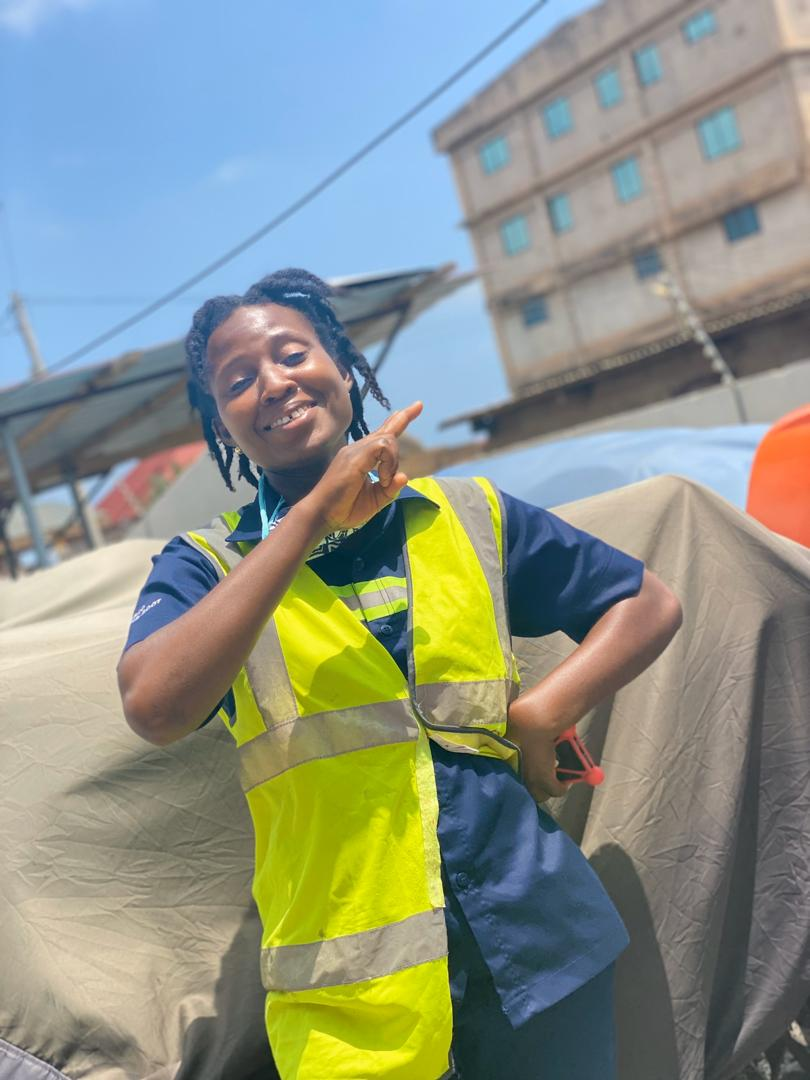

In [17]:
cv2_imshow(image)

There are 1 faces in this picture.
The face has been rotated through 333.434948822922 degrees anticlockwise


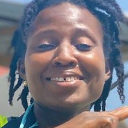

In [18]:
faceAlignment(image)

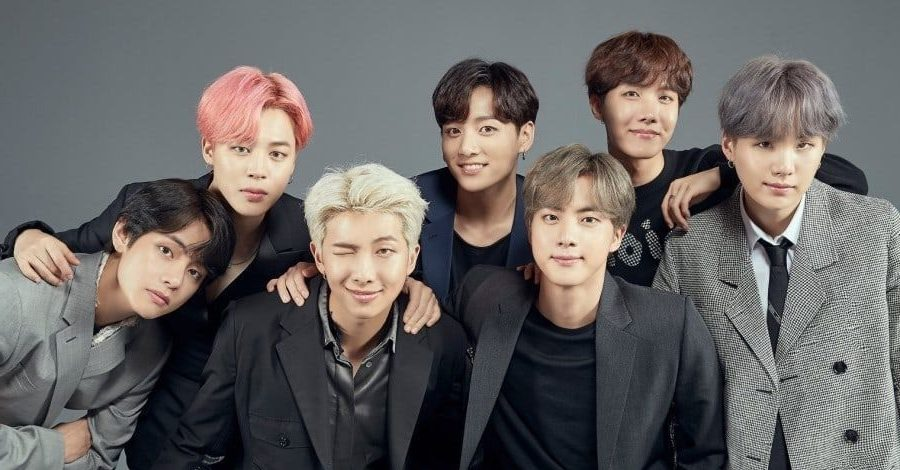

In [19]:
cv2_imshow(image1)

There are 7 faces in this picture.
The face has been rotated through 356.72951207681643 degrees anticlockwise


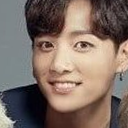

The face has been rotated through 360.0 degrees anticlockwise


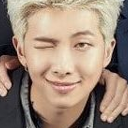

The face has been rotated through 2.9356734464211627 degrees anticlockwise


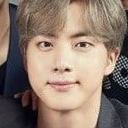

The face has been rotated through 7.907162702958459 degrees anticlockwise


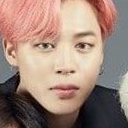

The face has been rotated through 6.519801751656985 degrees anticlockwise


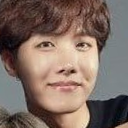

The face has been rotated through 360.0 degrees anticlockwise


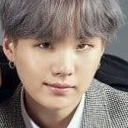

The face has been rotated through 22.06789956241022 degrees anticlockwise


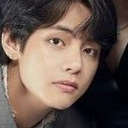

In [20]:
faceAlignment(image1)